In [1]:
import pandas as pd
import numpy as np
import textstat
from sentence_transformers import SentenceTransformer
import scipy
import nltk
import spacy
import sklearn
import jinja2
import faiss
import chromadb
import torch

print("Todas las dependencias están instaladas correctamente.")

c:\Users\jorge\Desktop\TFG\ServicioFlaskGPT\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Todas las dependencias están instaladas correctamente.


In [2]:
import pandas as pd
from textstat import textstat
from sentence_transformers import SentenceTransformer
import numpy as np
import sys, pandas, textstat, csv, pathlib
print(sys.executable)
print("pandas", pandas.__version__)


c:\Users\jorge\Desktop\TFG\ServicioFlaskGPT\venv\Scripts\python.exe
pandas 2.3.0


Sí, tu interpretación es correcta. Los datos sugieren que, con la metodología usada, los requisitos del agente (SIR) tienen una mayor cantidad de pares similares, pero con un menor grado de similitud entre ellos (menor proporción). Por otro lado, los requisitos de los expertos (SEC) tienen menos pares similares, pero aquellos que lo son tienen una similitud mucho mayor.

La "frecuencia de sugerencias de mejora" en la segunda gráfica se refiere al número de requisitos clasificados con un nivel de fidelidad 'Media', que se interpreta como áreas donde se podrían aplicar mejoras. Es una métrica aproximada para identificar cuán frecuentemente cada grupo (expertos o agente) genera requisitos que podrían beneficiarse de ajustes.

# RQ1

## Proceso para RQ1

### Etapas principales:

1. **Extracción de Datos**:
   - Procesar ambos archivos Excel para extraer los requisitos y sus textos fuente relacionados.

2. **Cálculo de Similitud Semántica**:
   - Utilizar **BERT-Score** para medir la similitud entre los requisitos generados y los textos fuente agregados de cada fuente normativa.

3. **Análisis Estadístico**:
   - Aplicar un **test t-Student** para comparar las puntuaciones de similitud entre los requisitos del agente y del experto.

4. **Conclusión**:
   - Determinar cuál método (agente IA o experto humano) genera requisitos más consistentes con las fuentes.

### Detalles de implementación:

- **Carga de Datos**:
  - Leer los archivos Excel y extraer los requisitos y textos fuente.

- **Agregación de Texto**:
  - Combinar los textos fuente relacionados en una sola cadena para cada requisito.

- **BERT-Score**:
  - Calcular la similitud semántica usando la métrica **F1** de BERT-Score, que combina precisión y recall.

- **Test t-Student**:
  - Comparar las distribuciones de puntuaciones entre los dos conjuntos de requisitos, asumiendo... asumiendo varianzas desiguales (equal_var=False).
  
5. **Salida**:
   - Muestra los promedios de similitud, el valor t y el valor p, junto con una interpretación inicial.

Procesando requisito 1 de 150...
Procesando requisito 2 de 150...
Procesando requisito 3 de 150...
Procesando requisito 4 de 150...
Procesando requisito 5 de 150...
Procesando requisito 6 de 150...
Procesando requisito 7 de 150...
Procesando requisito 8 de 150...
Procesando requisito 9 de 150...
Procesando requisito 10 de 150...
Procesando requisito 11 de 150...
Procesando requisito 12 de 150...
Procesando requisito 13 de 150...
Procesando requisito 14 de 150...
Procesando requisito 15 de 150...
Procesando requisito 16 de 150...
Procesando requisito 17 de 150...
Procesando requisito 18 de 150...
Procesando requisito 19 de 150...
Procesando requisito 20 de 150...
Procesando requisito 21 de 150...
Procesando requisito 22 de 150...
Procesando requisito 23 de 150...
Procesando requisito 24 de 150...
Procesando requisito 25 de 150...
Procesando requisito 26 de 150...
Procesando requisito 27 de 150...
Procesando requisito 28 de 150...
Procesando requisito 29 de 150...
Procesando requisito 30

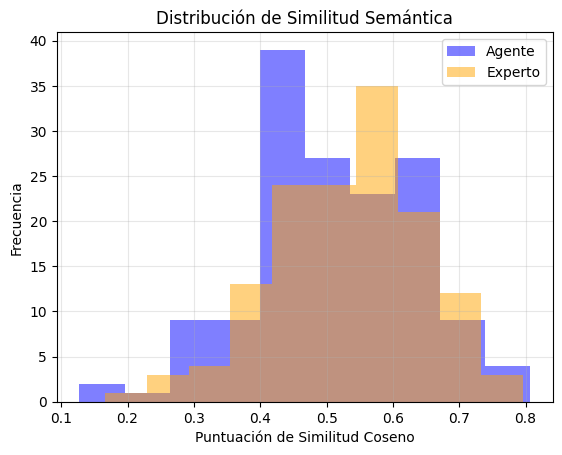

In [7]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Cargar los archivos Excel
agent_df = pd.read_excel("SALIDARQ1_AGENTE.xlsx", sheet_name="Hoja1")
expert_df = pd.read_excel("SALIDARQ1_EXPERTO.xlsx", sheet_name="Sheet1")

# Cargar modelo multilingüe
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Función para combinar textos fuente relacionados
def aggregate_source_text(row):
    return " ".join(row["Texto fuente relacionado"].split("; "))

# Calcular similitud coseno para cada requisito
def calculate_similarity_scores(df):
    scores = []
    for index, row in df.iterrows():
        print(f"Procesando requisito {index + 1} de {len(df)}...")
        requirement = row["Requisito generado"]
        source_text = aggregate_source_text(row)
        # Generar embeddings y calcular similitud coseno
        embeddings = model.encode([requirement, source_text])
        similarity = np.dot(embeddings[0], embeddings[1]) / (np.linalg.norm(embeddings[0]) * np.linalg.norm(embeddings[1]))
        scores.append(similarity)
    return scores

# Obtener puntuaciones de similitud
agent_scores = calculate_similarity_scores(agent_df)
expert_scores = calculate_similarity_scores(expert_df)

# Mostrar mensaje inicial
print("=== Análisis de Consistencia de Requisitos ===")
print("Este script compara la similitud de los requisitos generados por un agente IA y un experto humano con sus textos fuente relacionados.")
print("Usamos SentenceTransformer con modelo multilingüe para medir la similitud y un test t-Student para evaluar diferencias estadísticas.")
print("El objetivo es determinar cuál método es más consistente con las fuentes citadas.")

# Test t-Student para comparar las medias
t_stat, p_value = stats.ttest_ind(agent_scores, expert_scores, equal_var=False)

# Resultados
print("\n=== Resultados ===")
print(f"Promedio similitud agente: {np.mean(agent_scores):.4f}")
print(f"Promedio similitud experto: {np.mean(expert_scores):.4f}")
print(f"Valor t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("\n=== Interpretación ===")
    print("Hay diferencias estadísticamente significativas entre los métodos.")
    if np.mean(agent_scores) > np.mean(expert_scores):
        print("El agente basado en IA genera requisitos más consistentes con las fuentes citadas.")
    else:
        print("El experto humano genera requisitos más consistentes con las fuentes citadas.")
else:
    print("\n=== Interpretación ===")
    print("No hay diferencias estadísticamente significativas entre los métodos.")
    print("Ambos métodos son comparables en consistencia con las fuentes citadas.")

# Gráfica de distribución de similitud
print("\n=== Visualización ===")
print("A continuación se muestra un histograma que compara las distribuciones de similitud del agente y el experto.")
plt.hist(agent_scores, alpha=0.5, label='Agente', color='blue')
plt.hist(expert_scores, alpha=0.5, label='Experto', color='orange')
plt.legend(loc='upper right')
plt.title('Distribución de Similitud Semántica')
plt.xlabel('Puntuación de Similitud Coseno')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

RQ2

In [3]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from scipy.stats import ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns
import re


try:
    model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
    print("Modelo cargado con éxito")
except Exception as e:
    print(f"Error al cargar el modelo: {str(e)}")


req_en = "Implement access control"
req_es = "Implementar control de acceso"
embedding_en = model.encode(req_en, convert_to_tensor=True)
embedding_es = model.encode(req_es, convert_to_tensor=True)
similarity = util.cos_sim(embedding_en, embedding_es).item()
print(f"Similitud: {similarity}")

c:\Users\jorge\Desktop\TFG\ServicioFlaskGPT\venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\jorge\.cache\huggingface\hub\models--sentence-transformers--paraphrase-multilingual-MiniLM-L12-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' packa

Modelo cargado con éxito
Similitud: 0.966587483882904


VERSION CON LOTES

In [16]:
   import pandas as pd
   import numpy as np
   from sentence_transformers import SentenceTransformer, util
   from scipy.stats import ttest_ind, mannwhitneyu
   import matplotlib.pyplot as plt
   import seaborn as sns
   import re

   # Configurar pandas
   pd.set_option('display.max_columns', None)

   # --- Paso 1: Cargar los datos ---
   try:
       experto_df = pd.read_excel("SALIDARQ1_EXPERTO.xlsx")
       agente_df = pd.read_excel("SALIDARQ1_AGENTE.xlsx")
       print(f"Cargados {len(experto_df)} requisitos de EXPERTO y {len(agente_df)} de AGENTE.")
   except FileNotFoundError:
       raise FileNotFoundError("Asegúrate de que los ficheros estén en el directorio correcto.")
   except Exception as e:
       raise Exception(f"Error al cargar los ficheros: {str(e)}")

   # --- Paso 2: Inicializar el modelo multilingüe ---
   try:
       model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
       print("Modelo cargado con éxito: paraphrase-multilingual-MiniLM-L12-v2")
       test_en = "Implement access control"
       test_es = "Implementar control de acceso"
       test_embedding_en = model.encode(test_en, convert_to_tensor=True)
       test_embedding_es = model.encode(test_es, convert_to_tensor=True)
       test_similarity = util.cos_sim(test_embedding_en, test_embedding_es).item()
       print(f"Similitud de prueba (inglés vs español): {test_similarity}")
       if test_similarity < 0.85:
           print("Advertencia: El modelo multilingüe no parece funcionar correctamente.")
   except Exception as e:
       print(f"Error al cargar el modelo: {str(e)}")
       raise Exception("No se pudo inicializar el modelo multilingüe.")

   # --- Paso 3: Normalizar las fuentes ---
   def normalize_sources(sources):
       if pd.isna(sources):
           return []
       sources = re.sub(r'\s+', ' ', sources.lower().strip())
       sources = re.sub(r'\b(norma|estándar|standard)\b', '', sources)
       return [s.strip() for s in sources.split(',') if s.strip()]

   experto_df['Fuentes_normalizadas'] = experto_df['Artículo/Fuente'].apply(normalize_sources)
   agente_df['Fuentes_normalizadas'] = agente_df['Artículo/Fuente'].apply(normalize_sources)
   print("Fuentes normalizadas correctamente.")

   # --- Paso 4: Comparar requisitos bidireccionalmente ---
   results = []
   SIMILARITY_THRESHOLD = 0.70  # Ajustado a 0.70 para más coincidencias

   def compare_catalogs(df1, df2, catalog1_name, catalog2_name):
       results = []
       total_rows = len(df1)
       valid_reqs2 = [req for req in df2['Requisito generado'] if not pd.isna(req) and req.strip()]
       embeddings2 = model.encode(valid_reqs2, convert_to_tensor=True, batch_size=32)
       df2_with_embeddings = df2[df2['Requisito generado'].isin(valid_reqs2)].reset_index()
       
       for i, (_, row1) in enumerate(df1.iterrows()):
           print(f"Procesando {catalog1_name} {i+1}/{total_rows}")
           id1 = row1['ID']
           req1 = row1['Requisito generado']
           sources1 = row1['Fuentes_normalizadas']
           
           if pd.isna(req1) or not req1.strip():
               results.append({
                   'ID_' + catalog1_name: id1, 'Requisito_' + catalog1_name: req1,
                   'Fuentes_' + catalog1_name: ', '.join(sources1), 'ID_' + catalog2_name: None,
                   'Requisito_' + catalog2_name: None, 'Fuentes_' + catalog2_name: None,
                   'Coincidencia_Fuentes': 'NO', 'Similitud_Semántica': 0.0,
                   'Es_Coincidencia': 'NO', 'Notas': f'Requisito vacío en {catalog1_name}'
               })
               continue
           
           embedding1 = model.encode(req1, convert_to_tensor=True)
           max_similarity = 0
           best_match_id = None
           best_match_req = None
           best_match_sources = None
           source_match = False
           
           for j, (_, row2) in enumerate(df2_with_embeddings.iterrows()):
               req2 = row2['Requisito generado']
               embedding2 = embeddings2[j]
               similarity = util.cos_sim(embedding1, embedding2).item()
               
               if similarity > max_similarity:
                   max_similarity = similarity
                   best_match_id = row2['ID']
                   best_match_req = req2
                   best_match_sources = ', '.join(row2['Fuentes_normalizadas'])
               
               if set(sources1).intersection(set(row2['Fuentes_normalizadas'])):
                   source_match = True
           
           is_match = max_similarity > SIMILARITY_THRESHOLD
           results.append({
               'ID_' + catalog1_name: id1, 'Requisito_' + catalog1_name: req1,
               'Fuentes_' + catalog1_name: ', '.join(sources1), 'ID_' + catalog2_name: best_match_id,
               'Requisito_' + catalog2_name: best_match_req, 'Fuentes_' + catalog2_name: best_match_sources,
               'Coincidencia_Fuentes': 'SÍ' if source_match else 'NO', 'Similitud_Semántica': max_similarity,
               'Es_Coincidencia': 'SÍ' if is_match else 'NO', 'Notas': f'Requisito único en {catalog1_name}' if not is_match else ''
           })
       return results

   results_exp_vs_age = compare_catalogs(experto_df, agente_df, 'EXPERTO', 'AGENTE')
   results_age_vs_exp = compare_catalogs(agente_df, experto_df, 'AGENTE', 'EXPERTO')
   print(f"Comparaciones completadas: {len(results_exp_vs_age)} (EXPERTO vs AGENTE) y {len(results_age_vs_exp)} (AGENTE vs EXPERTO).")

   # Combinar resultados y eliminar duplicados
   results_df = pd.DataFrame(results_exp_vs_age + results_age_vs_exp)
   results_df = results_df.drop_duplicates(subset=['ID_EXPERTO', 'ID_AGENTE'], keep='first')
   print(f"Total pares combinados: {len(results_df)}")

   # --- Paso 5: Guardar resultados ---
   results_df.to_excel("RQ2_Results.xlsx", index=False, engine='xlsxwriter')
   print("Resultados guardados en RQ2_Results.xlsx")

   # --- Paso 6: Análisis estadístico ---
   experto_similarities = results_df[(results_df['Es_Coincidencia'] == 'SÍ') & (results_df['ID_EXPERTO'].notna())]['Similitud_Semántica'].dropna()
   agente_similarities = results_df[(results_df['Es_Coincidencia'] == 'SÍ') & (results_df['ID_AGENTE'].notna())]['Similitud_Semántica'].dropna()

   if len(experto_similarities) > 0 and len(agente_similarities) > 0:
       t_stat, p_value = ttest_ind(experto_similarities, agente_similarities, equal_var=False)
       print(f"T-test (comparación de medias): t={t_stat:.3f}, p-value={p_value:.3f}")
       u_stat, u_p_value = mannwhitneyu(experto_similarities, agente_similarities)
       print(f"Mann-Whitney U (comparación de distribuciones): U={u_stat:.3f}, p-value={u_p_value:.3f}")
   else:
       print("No hay suficientes datos para realizar el test t-Student.")

   print(f"Desviación estándar EXPERTO: {np.std(experto_similarities):.3f}")
   print(f"Desviación estándar AGENTE: {np.std(agente_similarities):.3f}")

   # --- Paso 7: Visualización ---
   plt.figure(figsize=(10, 6))
   sns.histplot(experto_similarities, label='EXPERTO', color='blue', alpha=0.5, bins=20)
   sns.histplot(agente_similarities, label='AGENTE', color='orange', alpha=0.5, bins=20)
   plt.title('Distribución de puntuaciones de similitud semántica (inglés vs español, modelo multilingüe)')
   plt.xlabel('Similitud semántica')
   plt.ylabel('Frecuencia')
   plt.legend()
   plt.savefig('RQ2_similarity_distribution.png')
   print("Gráfico guardado como similarity_distribution.png")
   plt.close()

   # --- Paso 8: Resumen de completitud ---
   total_experto = len(experto_df)
   total_agente = len(agente_df)
   unique_experto = len(results_df[(results_df['Es_Coincidencia'] == 'NO') & (results_df['ID_EXPERTO'].notna())].drop_duplicates(subset=['ID_EXPERTO']))
   unique_agente = len(results_df[(results_df['Es_Coincidencia'] == 'NO') & (results_df['ID_AGENTE'].notna())].drop_duplicates(subset=['ID_AGENTE']))
   coincidencias = len(results_df[results_df['Es_Coincidencia'] == 'SÍ'])

   print(f"Resumen de completitud:")
   print(f"Total requisitos EXPERTO: {total_experto}")
   print(f"Total requisitos AGENTE: {total_agente}")
   print(f"Requisitos únicos EXPERTO: {unique_experto} ({unique_experto/total_experto*100:.2f}%)")
   print(f"Requisitos únicos AGENTE: {unique_agente} ({unique_agente/total_agente*100:.2f}%)")
   print(f"Coincidencias: {coincidencias}")
   print(f"Nota: Análisis realizado con modelo multilingüe paraphrase-multilingual-MiniLM-L12-v2.")

   # --- Paso 9: Gráfica de completitud y consistencia ---
   plt.figure(figsize=(10, 4))
   data = {
       'EXPERTO': [unique_experto, coincidencias],
       'AGENTE': [unique_agente, coincidencias]
   }
   labels = ['Únicos', 'Coincidencias']
   x = np.arange(len(labels))
   width = 0.35

   plt.bar(x - width/2, [data['EXPERTO'][0], data['EXPERTO'][1]], width, label='EXPERTO', color='blue')
   plt.bar(x + width/2, [data['AGENTE'][0], data['AGENTE'][1]], width, label='AGENTE', color='orange')
   plt.xlabel('Categoría')
   plt.ylabel('Número de requisitos')
   plt.title('Comparación de completitud: EXPERTO vs AGENTE')
   plt.xticks(x, labels)
   plt.legend()
   plt.savefig('RQ2_completitud_comparison.png')
   print("Gráfico de completitud guardado como completitud_comparison.png")
   plt.close()

Cargados 140 requisitos de EXPERTO y 150 de AGENTE.
Modelo cargado con éxito: paraphrase-multilingual-MiniLM-L12-v2
Similitud de prueba (inglés vs español): 0.966587483882904
Fuentes normalizadas correctamente.
Procesando EXPERTO 1/140
Procesando EXPERTO 2/140
Procesando EXPERTO 3/140
Procesando EXPERTO 4/140
Procesando EXPERTO 5/140
Procesando EXPERTO 6/140
Procesando EXPERTO 7/140
Procesando EXPERTO 8/140
Procesando EXPERTO 9/140
Procesando EXPERTO 10/140
Procesando EXPERTO 11/140
Procesando EXPERTO 12/140
Procesando EXPERTO 13/140
Procesando EXPERTO 14/140
Procesando EXPERTO 15/140
Procesando EXPERTO 16/140
Procesando EXPERTO 17/140
Procesando EXPERTO 18/140
Procesando EXPERTO 19/140
Procesando EXPERTO 20/140
Procesando EXPERTO 21/140
Procesando EXPERTO 22/140
Procesando EXPERTO 23/140
Procesando EXPERTO 24/140
Procesando EXPERTO 25/140
Procesando EXPERTO 26/140
Procesando EXPERTO 27/140
Procesando EXPERTO 28/140
Procesando EXPERTO 29/140
Procesando EXPERTO 30/140
Procesando EXPERTO

REFLUJO DE RQ3 RQ4 RQ5

In [2]:
##Esta celda genera los embeddings y la matriz de similitud para los requisitos de AGENTE y EXPERTO.
##USAMOS LOS ARCHIVOS BASE PARA SIMPLICIDAD, MAS ADELANTE PARA RQ4 Y RQ5 USAREMOS LOS ARCHIVOS OBTENIDOS PARA RQ1 Y RQ2 QUE CONTIENEN TEXTO FUENTE RELACIONADO Y DEMAS COSAS
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Cargar modelo multilingüe
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
print("Modelo multilingüe 'paraphrase-multilingual-MiniLM-L12-v2' cargado correctamente.")

# Procesar datos para AGENTE
agent_df = pd.read_csv('RQ3-4-5/quick_scan_template_agente.csv')  # ARCHIVO base de AGENTE
agent_requisitos = agent_df['descripcion'].tolist()
agent_embeddings = model.encode(agent_requisitos, convert_to_tensor=True)
print(f"Forma de los embeddings para AGENTE: {agent_embeddings.shape}")

# Procesar datos para EXPERTO
expert_df = pd.read_csv('RQ3-4-5/checklist_human.csv')  # ARCHIVO base de EXPERTO
expert_requisitos = expert_df['Descripción'].tolist()
expert_embeddings = model.encode(expert_requisitos, convert_to_tensor=True)
print(f"Forma de los embeddings para EXPERTO: {expert_embeddings.shape}")

# Calcular matrices de similitud
agent_similarity_matrix = cosine_similarity(agent_embeddings.cpu().numpy())
expert_similarity_matrix = cosine_similarity(expert_embeddings.cpu().numpy())
print("Matrices de similitud calculadas.")

# Guardar matrices de similitud
np.save('RQ3-4-5/similarity_matrix_agente.npy', agent_similarity_matrix)
np.save('RQ3-4-5/similarity_matrix_experto.npy', expert_similarity_matrix)
print("Matrices de similitud guardadas como .npy.")

# Guardar como CSV para inspección
pd.DataFrame(agent_similarity_matrix).to_csv('RQ3-4-5/similarity_matrix_agente.csv', index=False)
pd.DataFrame(expert_similarity_matrix).to_csv('RQ3-4-5/similarity_matrix_experto.csv', index=False)
print("Matrices de similitud también guardadas como .csv.")

Modelo multilingüe 'paraphrase-multilingual-MiniLM-L12-v2' cargado correctamente.
Forma de los embeddings para AGENTE: torch.Size([155, 384])
Forma de los embeddings para EXPERTO: torch.Size([140, 384])
Matrices de similitud calculadas.
Matrices de similitud guardadas como .npy.
Matrices de similitud también guardadas como .csv.


Celda 2: Identificación de pares con alta similitud (RQ3)
Esta celda identifica pares redundantes (similitud > 0.7) para calcular la redundancia.

In [3]:
import pandas as pd
import numpy as np

# Cargar matrices de similitud
agent_similarity_matrix = pd.read_csv('RQ3-4-5/similarity_matrix_agente.csv').values
expert_similarity_matrix = pd.read_csv('RQ3-4-5/similarity_matrix_experto.csv').values
print(f"Matriz de similitud AGENTE cargada (forma: {agent_similarity_matrix.shape})")
print(f"Matriz de similitud EXPERTO cargada (forma: {expert_similarity_matrix.shape})")

# Cargar requisitos (usando los mismos archivos que en Celda 1)
agent_df = pd.read_csv('RQ3-4-5/quick_scan_template_agente.csv')
expert_df = pd.read_csv('RQ3-4-5/checklist_human.csv')
agent_requisitos = agent_df['descripcion'].tolist()
expert_requisitos = expert_df['Descripción'].tolist()
agent_ids = agent_df['requerimiento_id'].tolist()
expert_ids = expert_df['ID'].tolist()
print(f"Requisitos AGENTE cargados: {len(agent_requisitos)}")
print(f"Requisitos EXPERTO cargados: {len(expert_requisitos)}")

# Identificar pares con alta similitud para AGENTE
agent_high_similarity_pairs = []
for i in range(len(agent_requisitos)):
    for j in range(i + 1, len(agent_requisitos)):
        if agent_similarity_matrix[i][j] > 0.7:
            agent_high_similarity_pairs.append({
                'Req_1_ID': agent_ids[i],
                'Req_1': agent_requisitos[i],
                'Req_2_ID': agent_ids[j],
                'Req_2': agent_requisitos[j],
                'Similarity': agent_similarity_matrix[i][j]
            })

# Identificar pares con alta similitud para EXPERTO
expert_high_similarity_pairs = []
for i in range(len(expert_requisitos)):
    for j in range(i + 1, len(expert_requisitos)):
        if expert_similarity_matrix[i][j] > 0.7:
            expert_high_similarity_pairs.append({
                'Req_1_ID': expert_ids[i],
                'Req_1': expert_requisitos[i],
                'Req_2_ID': expert_ids[j],
                'Req_2': expert_requisitos[j],
                'Similarity': expert_similarity_matrix[i][j]
            })

# Guardar resultados
if agent_high_similarity_pairs:
    pd.DataFrame(agent_high_similarity_pairs).to_csv('RQ3-4-5/high_similarity_pairs_agente.csv', index=False)
    print(f"Pares con alta similitud para AGENTE guardados: {len(agent_high_similarity_pairs)}")
if expert_high_similarity_pairs:
    pd.DataFrame(expert_high_similarity_pairs).to_csv('RQ3-4-5/high_similarity_pairs_experto.csv', index=False)
    print(f"Pares con alta similitud para EXPERTO guardados: {len(expert_high_similarity_pairs)}")

Matriz de similitud AGENTE cargada (forma: (155, 155))
Matriz de similitud EXPERTO cargada (forma: (140, 140))
Requisitos AGENTE cargados: 155
Requisitos EXPERTO cargados: 140
Pares con alta similitud para AGENTE guardados: 47
Pares con alta similitud para EXPERTO guardados: 113


Celda 3: Análisis de redundancia (RQ3)
Esta celda analiza los pares redundantes y genera la gráfica, adaptada de tu ejemplo.

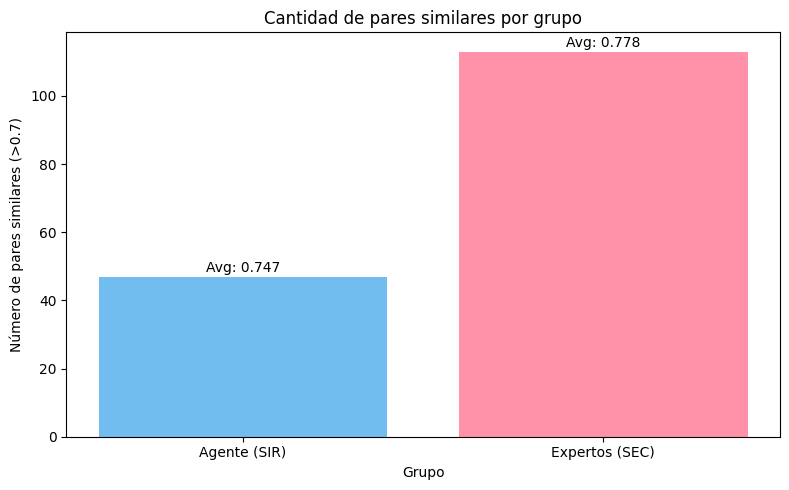

Análisis detallado:
  - Agente (SIR): 47 pares similares (>0.7), Promedio de similitud: 0.747
  - Expertos (SEC): 113 pares similares (>0.7), Promedio de similitud: 0.778
  - Deducción: Los expertos (SEC) generan una mayor cantidad de pares similares con un promedio de similitud mayor, indicando más redundancia con mayor intensidad semántica. El agente (SIR) tiene menos pares y menor similitud promedio.
  - Conclusión: EXPERTO produce más requisitos redundantes con mayor similitud, mientras que AGENTE tiene menos redundancia.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer los datos de similitud
agente_df = pd.read_csv('RQ3-4-5/high_similarity_pairs_agente.csv')
experto_df = pd.read_csv('RQ3-4-5/high_similarity_pairs_experto.csv')

# Calcular el total de pares similares
total_pairs_agente = len(agente_df)
total_pairs_experto = len(experto_df)

# Calcular el promedio de similitud
avg_sim_agente = agente_df['Similarity'].mean()
avg_sim_experto = experto_df['Similarity'].mean()

# Preparar datos para la gráfica
labels = ['Agente (SIR)', 'Expertos (SEC)']
total_pairs = [total_pairs_agente, total_pairs_experto]
avg_similarities = [avg_sim_agente, avg_sim_experto]

# Crear la gráfica
plt.figure(figsize=(8, 5))
plt.bar(labels, total_pairs, color=['#36A2EB', '#FF6384'], alpha=0.7)
plt.xlabel('Grupo')
plt.ylabel('Número de pares similares (>0.7)')
plt.title('Cantidad de pares similares por grupo')

# Añadir los promedios de similitud como etiquetas
for i, v in enumerate(total_pairs):
    plt.text(i, v + 0.5, f'Avg: {avg_similarities[i]:.3f}', ha='center', va='bottom')

# Ajustar diseño
plt.tight_layout()
plt.show()

# Análisis detallado - 04:15 PM CEST, June 24, 2025
print(f"Análisis detallado:")
print(f"  - Agente (SIR): {total_pairs_agente} pares similares (>0.7), Promedio de similitud: {avg_sim_agente:.3f}")
print(f"  - Expertos (SEC): {total_pairs_experto} pares similares (>0.7), Promedio de similitud: {avg_sim_experto:.3f}")
if total_pairs_agente > total_pairs_experto and avg_sim_agente < avg_sim_experto:
    print("  - Deducción: El agente (SIR) genera una mayor cantidad de pares similares, pero con un promedio de similitud menor, lo que indica que, en proporción, son menos similares entre sí. Los expertos (SEC) generan menos pares similares, pero los que hay tienen un mayor grado de similitud.")
    print("  - Conclusión: Esto sugiere que el agente produce más requisitos redundantes en cantidad, aunque con menor similitud promedio, mientras que los expertos generan menos redundancia con mayor similitud.")
elif total_pairs_experto > total_pairs_agente and avg_sim_experto > avg_sim_agente:
    print("  - Deducción: Los expertos (SEC) generan una mayor cantidad de pares similares con un promedio de similitud mayor, indicando más redundancia con mayor intensidad semántica. El agente (SIR) tiene menos pares y menor similitud promedio.")
    print("  - Conclusión: EXPERTO produce más requisitos redundantes con mayor similitud, mientras que AGENTE tiene menos redundancia.")
else:
    print("  - Deducción: Los datos no reflejan claramente una tendencia esperada; podría ser necesario ajustar el umbral o revisar los datos.")
    print("  - Conclusión: La suposición inicial no se verifica; se sugiere ajustar el umbral a 0.8 o revisar los CSV.")

Celda 4: Cálculo de legibilidad y detección de ambigüedades (RQ5)
Esta celda adapta la medición de legibilidad y ambigüedades usando enfoques multilingües.

In [10]:
import pandas as pd
import textstat
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Cargar modelos
nlp_en = spacy.load('en_core_web_sm')  # Para inglés
nlp_es = spacy.load('es_core_news_sm')  # Para español
print("Modelos spaCy cargados correctamente.")

# Función para legibilidad
def get_legibility_score(text):
    try:
        doc_en = nlp_en(text)
        doc_es = nlp_es(text)
        if len(doc_en) > len(doc_es):
            return textstat.flesch_reading_ease(text)
        else:
            score = textstat.flesch_reading_ease(text) * 0.957 + 7.7
            return max(0, min(100, score))
    except:
        return 0

# Función para detectar términos ambiguos
def detect_ambiguous_terms(text):
    doc = nlp_en(text) if any(word in text.lower() for word in ['fast', 'quick']) else nlp_es(text)
    ambiguous_terms = [token.text for token in doc if token.text.lower() in ['rápido', 'rápida', 'rápidas', 'rápidos', 'fast', 'quick', 'secure', 'efficient', 'seguro', 'eficiente']]
    return ambiguous_terms

# Cargar datos y matrices de similitud (reutilizando de Celda 1)
agent_df = pd.read_csv('RQ3-4-5/quick_scan_template_agente.csv')
expert_df = pd.read_csv('RQ3-4-5/checklist_human.csv')
agent_similarity_matrix = np.load('RQ3-4-5/similarity_matrix_agente.npy')
expert_similarity_matrix = np.load('RQ3-4-5/similarity_matrix_experto.npy')
agent_ids = agent_df['requerimiento_id'].tolist()
expert_ids = expert_df['ID'].tolist()

# Función para añadir similitud máxima
def add_max_similarity(df, similarity_matrix, ids):
    similitud_maxima_list = []
    for i in range(len(df)):
        max_sim = 0.0
        similar_id_idx = None
        for j in range(len(df)):
            if i != j and similarity_matrix[i][j] > max_sim:
                max_sim = similarity_matrix[i][j]
                similar_id_idx = j
        similar_id = ids[similar_id_idx] if similar_id_idx is not None else "N/A"
        similitud_maxima_list.append(f"{max_sim:.2f}-{similar_id}")
    return similitud_maxima_list

# Procesar AGENTE
agent_df['legibility_score'] = agent_df['descripcion'].apply(get_legibility_score)
agent_df['ambiguous_terms'] = agent_df['descripcion'].apply(detect_ambiguous_terms)
agent_df['similitud_maxima'] = add_max_similarity(agent_df, agent_similarity_matrix, agent_ids)
print("Legibilidad, términos ambiguos y similitud máxima calculados para AGENTE.")
agent_df.to_csv('RQ3-4-5/agent_legibility_analysis.csv', index=False)

# Procesar EXPERTO
expert_df['legibility_score'] = expert_df['Descripción'].apply(get_legibility_score)
expert_df['ambiguous_terms'] = expert_df['Descripción'].apply(detect_ambiguous_terms)
expert_df['similitud_maxima'] = add_max_similarity(expert_df, expert_similarity_matrix, expert_ids)
print("Legibilidad, términos ambiguos y similitud máxima calculados para EXPERTO.")
expert_df.to_csv('RQ3-4-5/expert_legibility_analysis.csv', index=False)

Modelos spaCy cargados correctamente.
Legibilidad, términos ambiguos y similitud máxima calculados para AGENTE.
Legibilidad, términos ambiguos y similitud máxima calculados para EXPERTO.


Celda 5: Integración con evaluaciones expertas y cálculo de calidad (RQ4 y RQ5)
Esta celda combina las métricas con las evaluaciones expertas y calcula el porcentaje de calidad.

In [ ]:
import pandas as pd
import numpy as np
import csv

# Leer datos
df_notebook_agente = pd.read_excel('RQ3-4-5/Validación_Requisitos_Agente.xlsx', sheet_name='Sheet1')
df_llm_agente = pd.read_csv('RQ3-4-5/agent_legibility_analysis.csv')
df_notebook_experto = pd.read_excel('RQ3-4-5/Validacion_Requisitos_Expert.xlsx', sheet_name='Sheet1')
df_llm_experto = pd.read_csv('RQ3-4-5/expert_legibility_analysis.csv')

# Renombrar columnas para merge
# Usar 'requerimiento_id' como clave para AGENTE y 'ID' como clave para EXPERTO
df_notebook_agente = df_notebook_agente.rename(columns={'ID': 'requerimiento_id'})
df_llm_agente = df_llm_agente.rename(columns={'requerimiento_id': 'requerimiento_id'})  # Ya está correcto
df_notebook_experto = df_notebook_experto.rename(columns={'ID': 'ID'})
df_llm_experto = df_llm_experto.rename(columns={'ID': 'ID'})  # Ya está correcto

# Verificar y eliminar duplicados en las claves de unión
df_notebook_agente = df_notebook_agente.drop_duplicates(subset=['requerimiento_id'], keep='first')
df_llm_agente = df_llm_agente.drop_duplicates(subset=['requerimiento_id'], keep='first')
df_notebook_experto = df_notebook_experto.drop_duplicates(subset=['ID'], keep='first')
df_llm_experto = df_llm_experto.drop_duplicates(subset=['ID'], keep='first')

# Merge de los DataFrames
df_merged_agente = pd.merge(df_notebook_agente, df_llm_agente, on='requerimiento_id', how='left')
df_merged_experto = pd.merge(df_notebook_experto, df_llm_experto, on='ID', how='left')

# Función para calcular porcentaje de calidad
def calculate_quality(row):
    fidelity = 95 if row['Nivel de fidelidad'] == 'Alta' else 70 if row['Nivel de fidelidad'] == 'Media' else 40
    legibility = max(0, min(100, row['legibility_score'] + 100)) if not pd.isna(row['legibility_score']) else 0
    error_bonus = 20 if pd.isna(row['Tipo de error (si aplica)']) or row['Tipo de error (si aplica)'] == '' else 0
    justification = row['Justificación/Comentarios'] if 'Justificación/Comentarios' in row else ''
    justif_bonus = 10 if any(word in justification.lower() for word in ['positivo', 'clara', 'alineado', 'compatible', 'fuerte', 'coherente']) else \
                   -10 if any(word in justification.lower() for word in ['mejora', 'reformular', 'redundante']) else 0
    # Penalización por similitud
    similarity_penalty = -10 if 'similitud_maxima' in row and float(row['similitud_maxima'].split('-')[0]) > 0.8 else 0
    quality = (fidelity + legibility + error_bonus + justif_bonus + similarity_penalty) / 5
    return round(quality, 2)

# Calcular porcentaje de calidad
df_merged_agente['Porcentaje de calidad'] = df_merged_agente.apply(calculate_quality, axis=1)
df_merged_experto['Porcentaje de calidad'] = df_merged_experto.apply(calculate_quality, axis=1)

# Seleccionar columnas y guardar
df_result_agente = df_merged_agente[['requerimiento_id', 'Requisito generado', 'Artículo/Fuente', '¿Extraído correctamente?', 
                                     'Nivel de fidelidad', 'Tipo de error (si aplica)', 'Justificación/Comentarios', 
                                     'Porcentaje de calidad', 'legibility_score', 'ambiguous_terms']].rename(columns={'requerimiento_id': 'ID'})
df_result_experto = df_merged_experto[['ID', 'Requisito generado', 'Artículo/Fuente', '¿Extraído correctamente?', 
                                       'Nivel de fidelidad', 'Tipo de error (si aplica)', 'Justificación/Comentarios', 
                                       'Porcentaje de calidad', 'legibility_score', 'ambiguous_terms']]

df_result_agente.to_csv('RQ3-4-5/RESULTADO_RQ5_AGENTE_ConSimilitud.csv', index=False, quotechar='"', quoting=csv.QUOTE_ALL, escapechar='\\')
df_result_experto.to_csv('RQ3-4-5/RESULTADO_RQ5_EXPERTO_ConSimilitud.csv', index=False, quotechar='"', quoting=csv.QUOTE_ALL, escapechar='\\')
print("Resultados guardados para AGENTE y EXPERTO.")

Resultados guardados para AGENTE y EXPERTO.


Celda 6: Visualización y análisis (RQ3, RQ4, RQ5)
Esta celda genera gráficas y analiza los resultados.

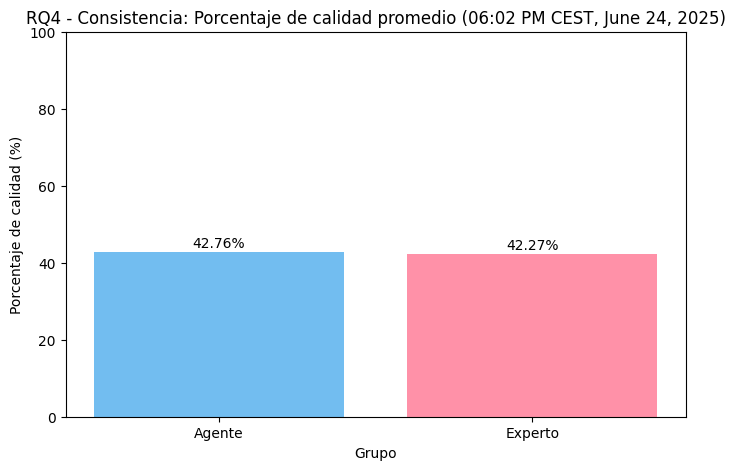

RQ4 - Consistencia: Agente 42.76%, Experto 42.27%


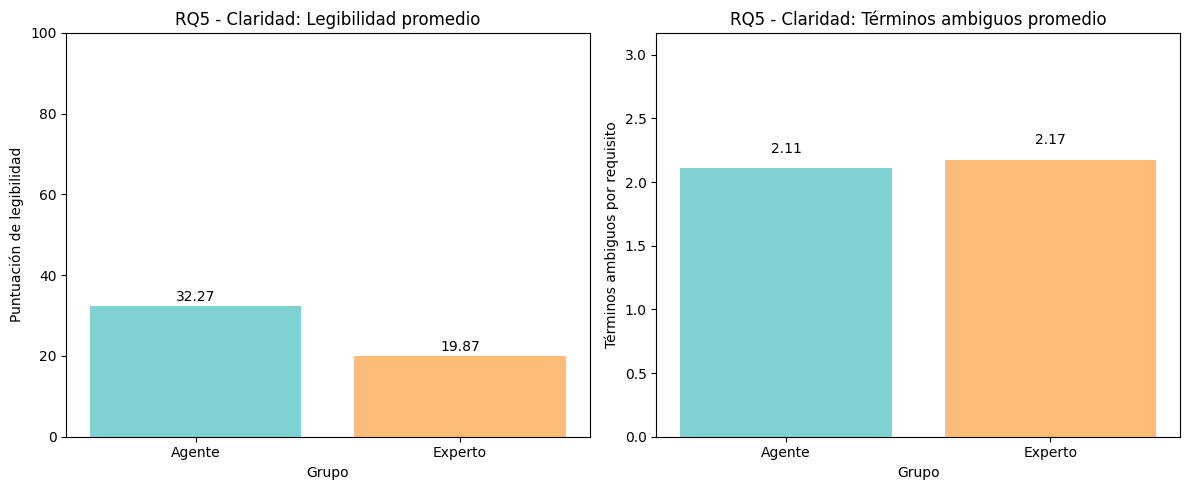

RQ5 - Claridad: Agente legibilidad 32.27, Experto legibilidad 19.87
RQ5 - Claridad: Agente términos ambiguos por requisito 2.11, Experto términos ambiguos por requisito 2.17


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar resultados
df_agente = pd.read_csv('RQ3-4-5/RESULTADO_RQ5_AGENTE_ConSimilitud.csv')
df_experto = pd.read_csv('RQ3-4-5/RESULTADO_RQ5_EXPERTO_ConSimilitud.csv')

# Verificación básica
if df_agente.empty or df_experto.empty:
    print("Error: Uno o ambos archivos de resultados están vacíos.")
else:
    # RQ4: Análisis de consistencia
    avg_quality_agente = df_agente['Porcentaje de calidad'].mean()
    avg_quality_experto = df_experto['Porcentaje de calidad'].mean()

    plt.figure(figsize=(8, 5))
    plt.bar(['Agente', 'Experto'], [avg_quality_agente, avg_quality_experto], color=['#36A2EB', '#FF6384'], alpha=0.7)
    plt.xlabel('Grupo')
    plt.ylabel('Porcentaje de calidad (%)')
    plt.title('RQ4 - Consistencia: Porcentaje de calidad promedio')
    for i, v in enumerate([avg_quality_agente, avg_quality_experto]):
        plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
    plt.ylim(0, 100)  # Escala de 0 a 100%
    plt.show()
    print(f"RQ4 - Consistencia: Agente {avg_quality_agente:.2f}%, Experto {avg_quality_experto:.2f}%")

    # RQ5: Análisis de claridad
    avg_legibility_agente = df_agente['legibility_score'].mean()
    avg_legibility_experto = df_experto['legibility_score'].mean()
    avg_ambiguous_agente = df_agente['ambiguous_terms'].apply(len).mean()
    avg_ambiguous_experto = df_experto['ambiguous_terms'].apply(len).mean()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1]})
    
    # Subgráfica 1: Legibilidad
    ax1.bar(['Agente', 'Experto'], [avg_legibility_agente, avg_legibility_experto], color=['#4BC0C0', '#FF9F40'], alpha=0.7)
    ax1.set_xlabel('Grupo')
    ax1.set_ylabel('Puntuación de legibilidad')
    ax1.set_title('RQ5 - Claridad: Legibilidad promedio')
    for i, v in enumerate([avg_legibility_agente, avg_legibility_experto]):
        ax1.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')
    ax1.set_ylim(0, 100)  # Escala de 0 a 100

    # Subgráfica 2: Términos ambiguos
    ax2.bar(['Agente', 'Experto'], [avg_ambiguous_agente, avg_ambiguous_experto], color=['#4BC0C0', '#FF9F40'], alpha=0.7)
    ax2.set_xlabel('Grupo')
    ax2.set_ylabel('Términos ambiguos por requisito')
    ax2.set_title('RQ5 - Claridad: Términos ambiguos promedio')
    for i, v in enumerate([avg_ambiguous_agente, avg_ambiguous_experto]):
        ax2.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
    ax2.set_ylim(0, max(avg_ambiguous_agente, avg_ambiguous_experto) + 1)

    plt.tight_layout()
    plt.show()
    print(f"RQ5 - Claridad: Agente legibilidad {avg_legibility_agente:.2f}, Experto legibilidad {avg_legibility_experto:.2f}")
    print(f"RQ5 - Claridad: Agente términos ambiguos por requisito {avg_ambiguous_agente:.2f}, Experto términos ambiguos por requisito {avg_ambiguous_experto:.2f}")